In [39]:
import numpy as np

from keras.models import Sequential
from keras.layers import UpSampling2D

import PIL.Image as Image
from pathlib import Path
import matplotlib.pyplot as plt

## up-sampling

### simple array

Let's start simple and look at up-sampling. We have in `keras` a layer for this:

`keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest')`.

Let's have a look at parameters:

- `nearest` interpolation basically just repeats our specified amount of time;

In [11]:
X = np.arange(4).reshape(2, 2)

In [12]:
X

array([[0, 1],
       [2, 3]])

In [13]:
X = X.reshape(1, 2, 2, 1)

In [17]:
model = Sequential()
model.add(UpSampling2D())

In [18]:
y = model.predict(X).reshape(4, 4)

In [19]:
y

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 3., 3.],
       [2., 2., 3., 3.]], dtype=float32)

In [20]:
n = 3

In [21]:
X = np.arange(n * n).reshape(n, n)

In [22]:
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [23]:
X = X.reshape(1, n, n, 1)

In [32]:
model = Sequential()
model.add(UpSampling2D(size=(4, 3)))

In [33]:
y = model.predict(X).reshape(4 * n, 3 * n)

In [34]:
y

array([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2.],
       [0., 0., 0., 1., 1., 1., 2., 2., 2.],
       [3., 3., 3., 4., 4., 4., 5., 5., 5.],
       [3., 3., 3., 4., 4., 4., 5., 5., 5.],
       [3., 3., 3., 4., 4., 4., 5., 5., 5.],
       [3., 3., 3., 4., 4., 4., 5., 5., 5.],
       [6., 6., 6., 7., 7., 7., 8., 8., 8.],
       [6., 6., 6., 7., 7., 7., 8., 8., 8.],
       [6., 6., 6., 7., 7., 7., 8., 8., 8.],
       [6., 6., 6., 7., 7., 7., 8., 8., 8.]], dtype=float32)

### real image

Let's try to upsample a real image.

#### get the image

In [44]:
img = Image.open('space-shuttle.jpg')
img.size

(620, 475)

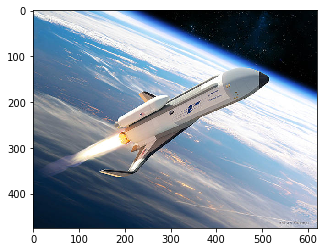

In [43]:
plt.imshow(img);

In [46]:
img_arr = np.array(img)
img_arr.shape

(475, 620, 3)

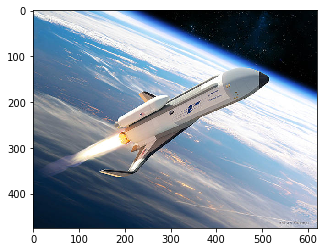

In [52]:
plt.imshow(img_arr);

#### up-sample

In [47]:
model = Sequential()
model.add(UpSampling2D())

In [70]:
img_arr_up = model.predict(img_arr.reshape(1, 475, 620, 3))

In [71]:
img_arr_up.shape

(1, 950, 1240, 3)

In [72]:
img_arr_up = img_arr_up.squeeze()

In [73]:
img_arr_up.shape

(950, 1240, 3)

In [74]:
img_arr_up.dtype

dtype('float32')

In [75]:
img_arr_up[0, 0, :]

array([220., 210., 218.], dtype=float32)

In [76]:
img_arr_up = img_arr_up.astype(np.int32)

In [77]:
img_arr_up[0, 0, :]

array([220, 210, 218], dtype=int32)

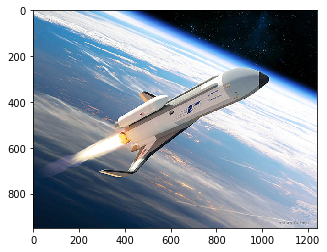

In [79]:
plt.imshow(img_arr_up)

#### prove that we just repeat the values

So everything is the same except the resolution is 2 times bigger. Let's try to prove that we actually repeat the numbers 4 times.

In [80]:
img_arr.shape, img_arr_up.shape

((475, 620, 3), (950, 1240, 3))

In [81]:
img_arr[:2, :2, 0]

array([[220, 214],
       [230, 216]], dtype=uint8)

In [83]:
img_arr_up[:4, :4, 0]

array([[220, 220, 214, 214],
       [220, 220, 214, 214],
       [230, 230, 216, 216],
       [230, 230, 216, 216]], dtype=int32)

#### bilinear interpolation

Let's do the same with another interpolation.

In [84]:
model = Sequential()
model.add(UpSampling2D(interpolation='bilinear'))
img_arr_up = model.predict(img_arr.reshape(1, 475, 620, 3)).squeeze().astype(np.int32)

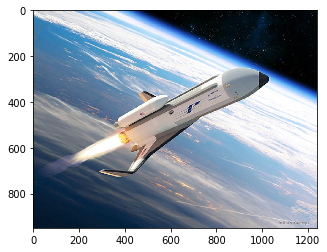

In [85]:
plt.imshow(img_arr_up);

In [86]:
img_arr[:2, :2, 0]

array([[220, 214],
       [230, 216]], dtype=uint8)

In [87]:
img_arr_up[:4, :4, 0]

array([[220, 217, 214, 217],
       [225, 220, 215, 215],
       [230, 223, 216, 213],
       [234, 232, 230, 227]], dtype=int32)

## transposed convolution